In [84]:
#Importando as bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
#Upload do arquivo
#from google.colab import files
#arq = files.upload()
#df = pd.read_excel("AdventureWorks.xlsx")

In [3]:
#Criando DataFrame
df = pd.read_excel("/content/AdventureWorks.xlsx")

In [4]:
#Visualizando as primeiras linhas
df.head(2)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [5]:
#Quantidade de linhas e colunas
df.shape

(904, 16)

In [6]:
#Tipos de dados
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [7]:
df.describe().round().transpose()

,count,mean,std,min,25%,50%,75%,max
ID Loja,904.0,270.0,51.0,199.0,199.0,306.0,307.0,307.0
ID Produto,904.0,1225.0,707.0,366.0,384.0,1202.0,1226.0,2497.0
ID Cliente,904.0,19029.0,96.0,18815.0,18965.0,19060.0,19107.0,19145.0
Custo Unitário,904.0,272.0,130.0,5.0,325.0,331.0,349.0,349.0
Preço Unitário,904.0,743.0,369.0,10.0,758.0,980.0,998.0,999.0
Quantidade,904.0,63.0,149.0,2.0,6.0,9.0,17.0,1560.0
Valor Desconto,904.0,689.0,822.0,0.0,0.0,461.0,1005.0,6272.0
Valor Venda,904.0,6620.0,4319.0,160.0,3920.0,5799.0,7986.0,29400.0


In [8]:
# Encontrando valores que não são numéricos em variáveis string
df['No. Venda'].str.isnumeric().value_counts()

False    904
Name: No. Venda, dtype: int64

# **Tratamento de duplicatas**

In [9]:
df.drop_duplicates().count()

Data Venda        904
Data Envio        904
ID Loja           904
ID Produto        904
ID Cliente        904
No. Venda         904
Custo Unitário    904
Preço Unitário    904
Quantidade        904
Valor Desconto    904
Valor Venda       904
Produto           904
Fabricante        904
Marca             904
Classe            904
Cor               904
dtype: int64

# **Verificando dados faltantes**

In [10]:
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
dtype: int64

# **Remove outliers**

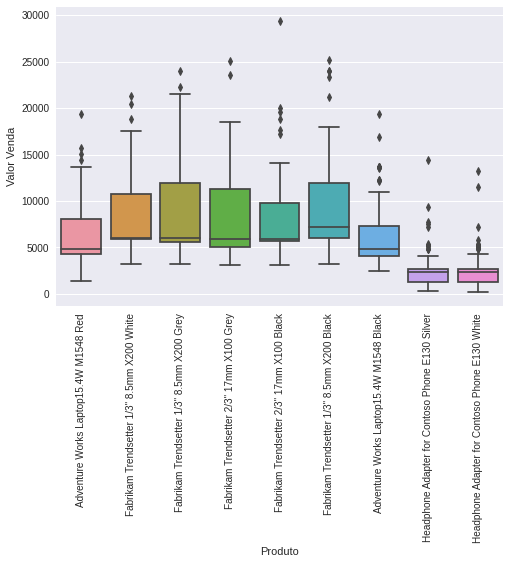

In [11]:
ax = sns.boxplot(y = 'Valor Venda', x = 'Produto', data = df)
ax.tick_params(axis='x', labelrotation=90)
plt.show()

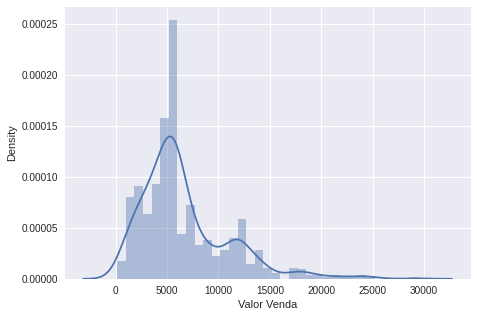

In [12]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Valor Venda'])
plt.show()

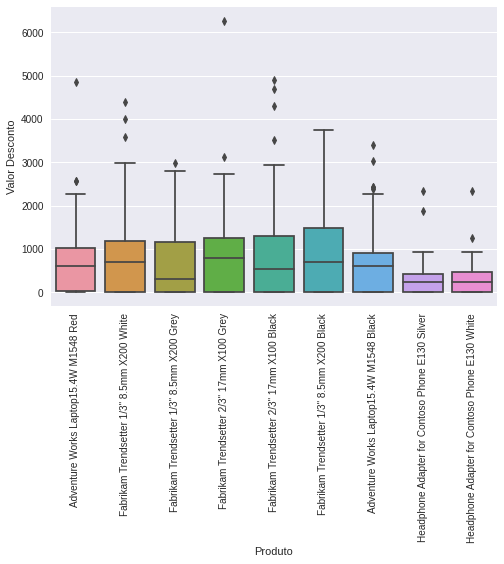

In [13]:
ax = sns.boxplot(y = 'Valor Desconto', x = 'Produto', data = df)
ax.tick_params(axis='x', labelrotation=90)
plt.show()

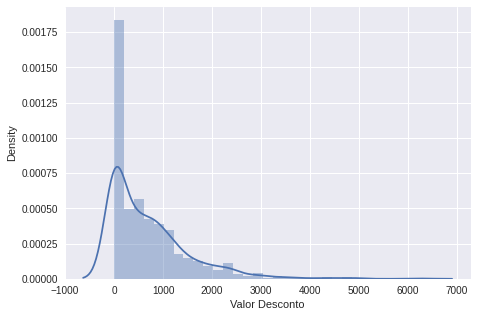

In [14]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Valor Desconto'])
plt.show()

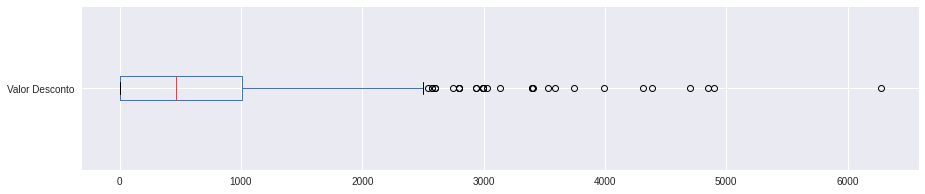

In [15]:
df.boxplot(column=['Valor Desconto'], figsize=(15, 3), vert=False);

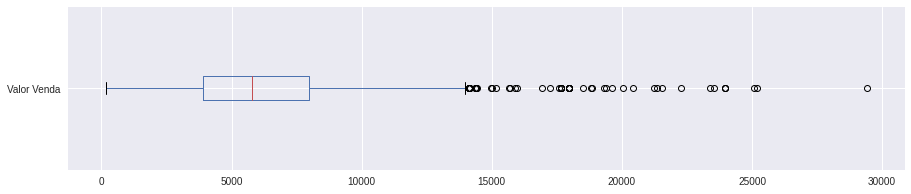

In [16]:
df.boxplot(column=['Valor Venda'], figsize=(15, 3), vert=False);

In [17]:
import numpy as np

def remove_outlier(df, column):
  upper_limit = df[column].mean() + 3*df[column].std()
  lower_limit = df[column].mean() - 3*df[column].std()

  Q1 = np.percentile(df[column], 25)
  Q3 = np.percentile(df[column], 75)
  IQR = Q3 - Q1
  upper_limit = (Q3+1.5*IQR)
  lower_limit = (Q1-1.5*IQR)

  return df.loc[(df[column] > lower_limit) & (df[column] < upper_limit)]


df = remove_outlier(df, 'Valor Venda')
print (df.shape)
df = remove_outlier(df, 'Valor Desconto')
print (df.shape)

(851, 16)
(835, 16)


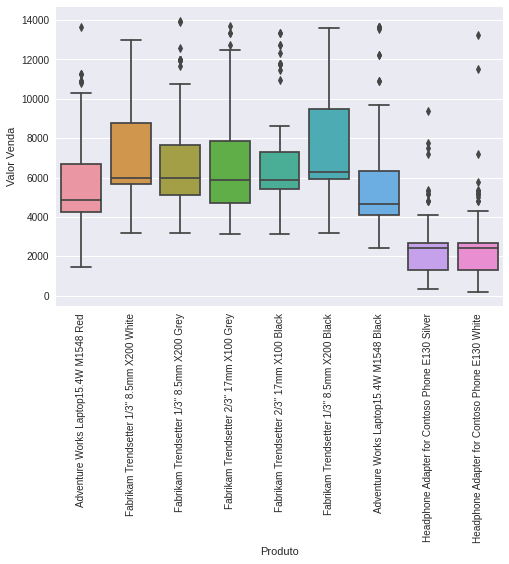

In [18]:
ax = sns.boxplot(y = 'Valor Venda', x = 'Produto', data = df)
ax.tick_params(axis='x', labelrotation=90)
plt.show()

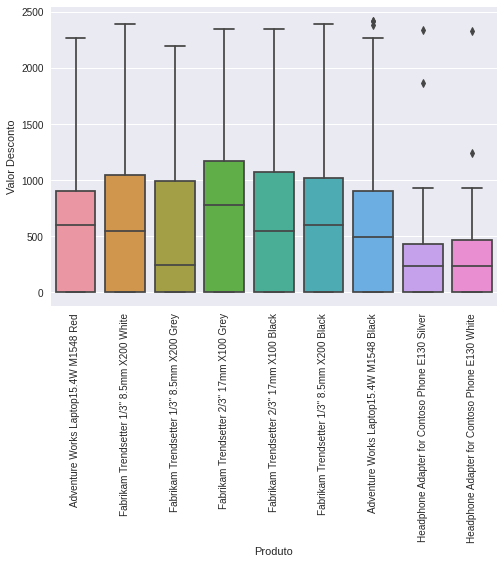

In [19]:
ax = sns.boxplot(y = 'Valor Desconto', x = 'Produto', data = df)
ax.tick_params(axis='x', labelrotation=90)
plt.show()

# **Discretizando os dados**

In [20]:
# Discretizando usando três quantis 
discretizado_df = df.copy()
discretizado_df['Classe Venda'] = pd.qcut(discretizado_df['Valor Venda'],q=[0,.3,.7,1], labels=["baixo", "médio", "alto"]) 
discretizado_df['Venda Discretizada'] = pd.cut(discretizado_df['Valor Venda'],bins=3)
discretizado_df.head(5)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Classe Venda,Venda Discretizada
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,médio,"(146.028, 4763.893]"
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,médio,"(146.028, 4763.893]"
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,médio,"(146.028, 4763.893]"
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,médio,"(146.028, 4763.893]"
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,médio,"(146.028, 4763.893]"


# **Análise descritiva**

In [21]:
#Recuperando os produtos vendidos
df['Produto'].unique()

array(['Adventure Works Laptop15.4W M1548 Red',
       "Fabrikam Trendsetter 1/3'' 8.5mm X200 White",
       "Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey",
       "Fabrikam Trendsetter 2/3'' 17mm X100 Grey",
       "Fabrikam Trendsetter 2/3'' 17mm X100 Black",
       "Fabrikam Trendsetter 1/3'' 8.5mm X200 Black",
       'Adventure Works Laptop15.4W M1548 Black',
       'Headphone Adapter for Contoso Phone E130 Silver',
       'Headphone Adapter for Contoso Phone E130 White'], dtype=object)

In [58]:
#Recuperando a quantidade vendida de cada produto
df['Produto'].value_counts()

Adventure Works Laptop15.4W M1548 Black            120
Adventure Works Laptop15.4W M1548 Red              109
Fabrikam Trendsetter 2/3'' 17mm X100 Grey          104
Fabrikam Trendsetter 2/3'' 17mm X100 Black          91
Headphone Adapter for Contoso Phone E130 Silver     86
Headphone Adapter for Contoso Phone E130 White      85
Fabrikam Trendsetter 1/3'' 8.5mm X200 White         83
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey          81
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black         76
Name: Produto, dtype: int64

In [62]:
#Verificando quais produtos obtiveram desconto
df[df['Valor Desconto'] > 0]['Produto'].unique()

array(['Adventure Works Laptop15.4W M1548 Red',
       "Fabrikam Trendsetter 2/3'' 17mm X100 Grey",
       "Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey",
       "Fabrikam Trendsetter 1/3'' 8.5mm X200 White",
       "Fabrikam Trendsetter 1/3'' 8.5mm X200 Black",
       "Fabrikam Trendsetter 2/3'' 17mm X100 Black",
       'Adventure Works Laptop15.4W M1548 Black',
       'Headphone Adapter for Contoso Phone E130 Silver',
       'Headphone Adapter for Contoso Phone E130 White'], dtype=object)

In [80]:
#Verificando quantos produtos obtiveram desconto
df[df['Valor Desconto'] > 0]['Produto'].value_counts()

Adventure Works Laptop15.4W M1548 Black            82
Adventure Works Laptop15.4W M1548 Red              81
Fabrikam Trendsetter 2/3'' 17mm X100 Grey          71
Headphone Adapter for Contoso Phone E130 White     62
Headphone Adapter for Contoso Phone E130 Silver    57
Fabrikam Trendsetter 2/3'' 17mm X100 Black         55
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black        53
Fabrikam Trendsetter 1/3'' 8.5mm X200 White        49
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey         44
Name: Produto, dtype: int64

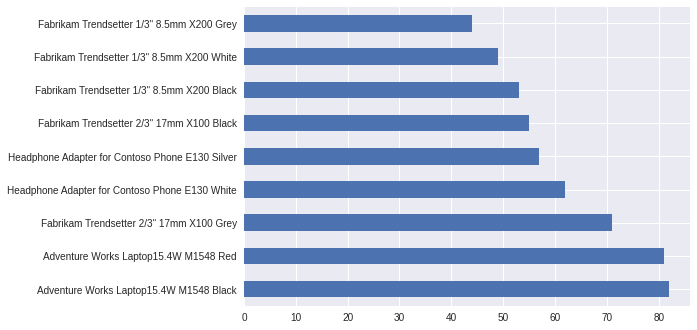

In [82]:
df[df['Valor Desconto'] > 0]['Produto'].value_counts().plot.barh();

In [65]:
#Verificando quais produtos são da marca Adventure Works
df[df['Marca'] == "Adventure Works"]['Produto'].unique()

array(['Adventure Works Laptop15.4W M1548 Red',
       'Adventure Works Laptop15.4W M1548 Black'], dtype=object)

In [79]:
#Verificando quais lojas deram desconto para produtos da marca Adventure Works
dfaw = df[df['Marca'] == "Adventure Works"]
dfaw = dfaw[dfaw['Valor Desconto'] > 0]
dfaw['ID Loja'].unique()

array([199, 307, 306])

In [83]:
#Verificando a quantidade de produtos por fabricante
grupo_Fabricante = df.groupby('Fabricante')['Produto']
grupo_Fabricante.value_counts()

Fabricante       Produto                                        
Adventure Works  Adventure Works Laptop15.4W M1548 Black            120
                 Adventure Works Laptop15.4W M1548 Red              109
Contoso, Ltd     Headphone Adapter for Contoso Phone E130 Silver     86
                 Headphone Adapter for Contoso Phone E130 White      85
Fabrikam, Inc.   Fabrikam Trendsetter 2/3'' 17mm X100 Grey          104
                 Fabrikam Trendsetter 2/3'' 17mm X100 Black          91
                 Fabrikam Trendsetter 1/3'' 8.5mm X200 White         83
                 Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey          81
                 Fabrikam Trendsetter 1/3'' 8.5mm X200 Black         76
Name: Produto, dtype: int64

In [22]:
#Calculando a média, media mode da receita total
mean = df["Valor Venda"].mean()
median =df["Valor Venda"].median()
mode = df["Valor Venda"].mode()
print(mean , median, mode)

5784.655176766467 5457.6 0    5880.0
dtype: float64


In [23]:
#Recuperando a receita total
df["Valor Venda"].sum()

4830187.0726

In [24]:
#Calculando o custo e inserindo como uma coluna
df["Custo"] = df["Custo Unitário"].mul(df["Quantidade"]) #Criando a coluna de custo

In [25]:
df.head(2)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [26]:
#Recuperando o custo total de todos os produtos
round(df["Custo"].sum(), 2)

2035938.58

In [27]:
#Calculando o lucro e inserindo como uma coluna
df["Lucro"]  = df["Valor Venda"] - df["Custo"] 

In [28]:
df.head(2)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [29]:
#Recuperando o lucro total
round(df["Lucro"].sum(),2)

2794248.49

Text(0, 0.5, 'Valor Desconto')

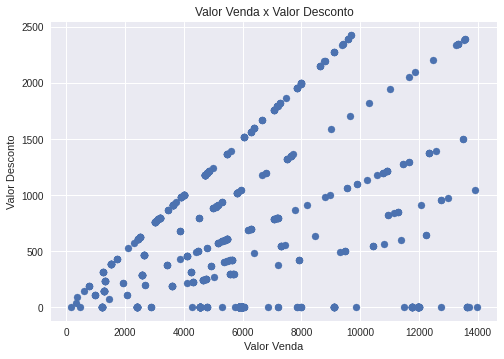

In [30]:
# Relação entre produto e desconto
plt.scatter(df["Valor Venda"], df["Valor Desconto"])
plt.title("Valor Venda x Valor Desconto")
plt.xlabel("Valor Venda")
plt.ylabel("Valor Desconto")

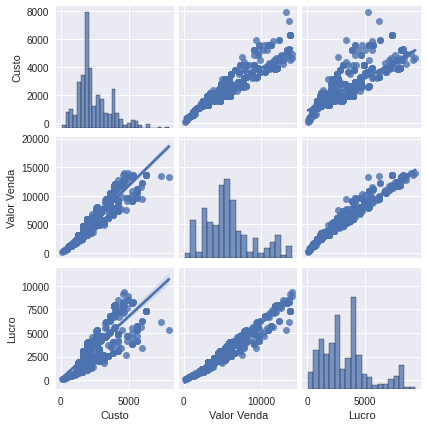

In [31]:
sns.pairplot(df,height=2, vars = ['Custo', 'Valor Venda','Lucro'],  kind="reg")
plt.show()

In [32]:
#Criando uma coluna com total de dias para enviar o produto
df["Tempo_envio"] = df["Data Envio"] - df["Data Venda"]

In [33]:
df.head(2)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,5 days


In [34]:
#Criando uma coluna com total de dias para enviar o produto e extraindo apenas os dias em formato numérico
df["Tempo_envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days

In [35]:
df.head(2)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,5


In [36]:
#Verificando o tipo da coluna Tempo_envio
df["Tempo_envio"].dtype

dtype('int64')

In [37]:
#Recuperando a média do tempo de envio por marca
df.groupby("Marca")["Tempo_envio"].mean()

Marca
Adventure Works    8.724891
Contoso            8.497076
Fabrikam           8.535632
Name: Tempo_envio, dtype: float64

In [38]:
df.shape

(835, 19)

In [39]:
#Verificando o lucro por ano e por marca
df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum()

Data Venda  Marca          
2008        Adventure Works    2.857134e+05
            Contoso            5.641600e+04
            Fabrikam           1.153725e+06
2009        Adventure Works    3.639342e+05
            Contoso            1.312030e+05
            Fabrikam           8.032574e+05
Name: Lucro, dtype: float64

In [87]:
pd.options.display.float_format = '{:20,.2f}'.format

In [88]:
#Verificando o lucro por ano e por marca, salvando em novo dataset e resetando o index
lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum().reset_index()
lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"285,713.36"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,153,724.57"
3,2009,Adventure Works,"363,934.24"
4,2009,Contoso,"131,202.95"
5,2009,Fabrikam,"803,257.37"


In [42]:
#Recuperando o total de produtos vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 White     25008
Headphone Adapter for Contoso Phone E130 Silver    23792
Adventure Works Laptop15.4W M1548 Black             1015
Adventure Works Laptop15.4W M1548 Red                917
Fabrikam Trendsetter 2/3'' 17mm X100 Grey            825
Fabrikam Trendsetter 2/3'' 17mm X100 Black           689
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          648
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          628
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           606
Name: Quantidade, dtype: int64

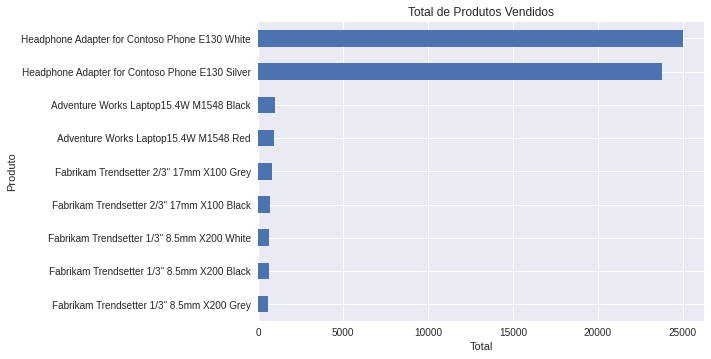

In [43]:
#Gráfico do total de produtos vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="Total de Produtos Vendidos")
plt.xlabel("Total")
plt.ylabel("Produto");

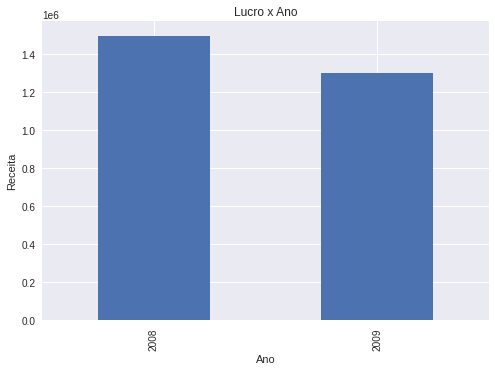

In [44]:
#Gráfico da relação do lucro por ano
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum().plot.bar(title="Lucro x Ano")
plt.xlabel("Ano")
plt.ylabel("Receita");

In [45]:
#Recuperando as vendas por ano
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum()

Data Venda
2008           1,495,853.93
2009           1,298,394.56
Name: Lucro, dtype: float64

In [46]:
#Selecionando apenas as vendas de 2009 e salvando em dataframe específico
df_2009 = df[df["Data Venda"].dt.year == 2009]

In [47]:
df_2009.head(2)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11


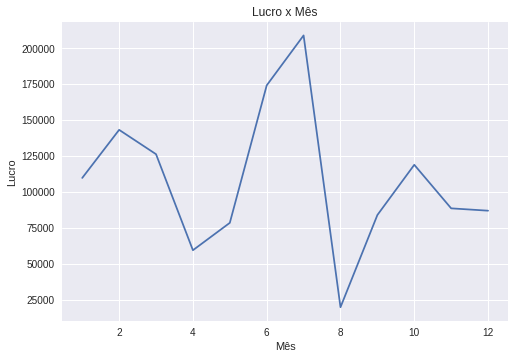

In [48]:
#Gráfico da relação do lucro por mês
df_2009.groupby(df_2009["Data Venda"].dt.month)["Lucro"].sum().plot(title="Lucro x Mês")
plt.xlabel("Mês")
plt.ylabel("Lucro");

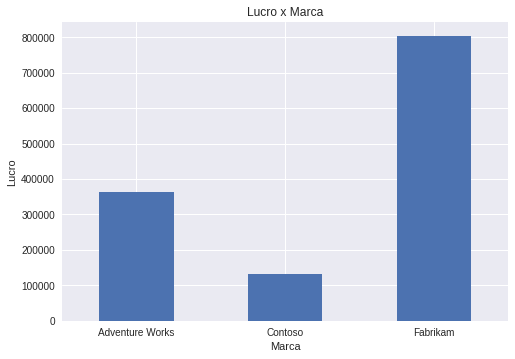

In [49]:
#Gráfico da relação do lucro por marca
df_2009.groupby("Marca")["Lucro"].sum().plot.bar(title="Lucro x Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');

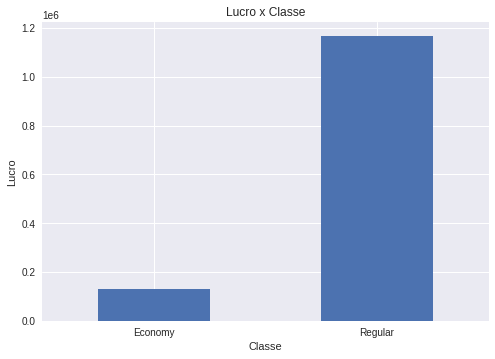

In [50]:
#Gráfico da relação do lucro por classe
df_2009.groupby("Classe")["Lucro"].sum().plot.bar(title="Lucro x Classe")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');

In [51]:
df["Tempo_envio"].describe()

count                 835.00
mean                    8.58
std                     3.07
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo_envio, dtype: float64

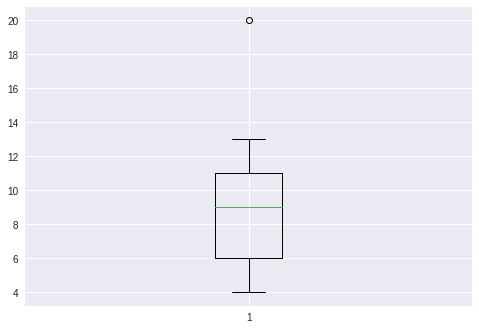

In [52]:
#Gráfico de Boxplot do tempo de envio 
plt.boxplot(df["Tempo_envio"]);

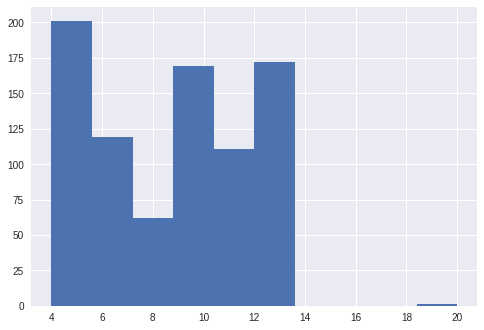

In [53]:
#Histograma do tempo de envio 
plt.hist(df["Tempo_envio"]);

In [54]:
#Recuperando o tempo mínimo de envio
df["Tempo_envio"].min()

4

In [55]:
#Recuperando o tempo máximo de envio
df['Tempo_envio'].max()

20

In [56]:
#Identificando o outlier
df[df["Tempo_envio"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [57]:
#Salvando dataframe em formato CSV
df.to_csv("df_vendas_novo.csv", index=False)